In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload the CSV file


Saving CC.csv to CC.csv


In [ ]:
import pandas as pd

# Replace 'CC.csv' with the correct filename if needed
file_path = "CC.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows to check the structure
df.head()


,Unnamed: 0,Department ↑,Unnamed: 2,Case Owner,Account Name,Subject,Date/Time Opened,Case Type,Case Detail,Senders Domain
0,NaN,CC Management,NaN,Nikhil Mehta,PS Dialpad Account,Daily case report for Saturday 1 February - 1 ...,2/1/2025 9:04 AM,Other,Junk,asknicelyemail.com
1,NaN,NaN,NaN,Nikhil Mehta,PS Dialpad Account,Daily case report for Sunday 2 February - 1 ov...,2/2/2025 9:04 AM,Other,Junk,asknicelyemail.com
2,NaN,NaN,NaN,Parts Operations Escalation,PS Dialpad Account,Daily case report for Monday 3 February - 1 ov...,2/3/2025 9:04 AM,Other,Junk,asknicelyemail.com
3,NaN,NaN,NaN,Sierra Ruff,GE Precision Healthcare LLC,Unconfirmed POs,2/3/2025 9:08 AM,Customer Request,Shipping Status,gehealthcare.com
4,NaN,NaN,NaN,Nikhil Mehta,William P Clements Jr Univ Hosp (CE),FW: ORDER #6810965,2/3/2025 11:02 AM,Customer Request,Shipping Status,partssource.com


In [ ]:
# View basic info
df.info()

# View column names
print(df.columns)

# Check for missing values
df.isnull().sum()

# Check basic statistics
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21280 entries, 0 to 21279
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      float64
 1   Department  ↑     19 non-null     object 
 2   Unnamed: 2        9 non-null      object 
 3   Case Owner        21276 non-null  object 
 4   Account Name      18208 non-null  object 
 5   Subject           21255 non-null  object 
 6   Date/Time Opened  21267 non-null  object 
 7   Case Type         20811 non-null  object 
 8   Case Detail       19743 non-null  object 
 9   Senders Domain    21167 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.6+ MB
Index(['Unnamed: 0', 'Department  ↑', 'Unnamed: 2', 'Case Owner',
       'Account Name', 'Subject', 'Date/Time Opened', 'Case Type',
       'Case Detail', 'Senders Domain'],
      dtype='object')


,Unnamed: 0,Department ↑,Unnamed: 2,Case Owner,Account Name,Subject,Date/Time Opened,Case Type,Case Detail,Senders Domain
count,0.0,19,9,21276,18208,21255,21267,20811,19743,21167
unique,NaN,12,1,177,3555,17206,10904,28,75,1476
top,NaN,Subtotal,Count,Customer Care,PS Dialpad Account,FWD: Undeliverable: Credits Case Open Subject,2/27/2025 12:58 PM,Returns,Junk,partssource.com
freq,NaN,8,9,1259,2732,277,39,4420,3619,9487
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop the 'Unnamed: 2' column
df = df.drop(columns=['Unnamed: 2'], errors='ignore')

# Fill forward the 'Department  ↑' column
df['Department  ↑'] = df['Department  ↑'].ffill()

# Display the result
df.head()



,Unnamed: 0,Department ↑,Case Owner,Account Name,Subject,Date/Time Opened,Case Type,Case Detail,Senders Domain
0,NaN,CC Management,Nikhil Mehta,PS Dialpad Account,Daily case report for Saturday 1 February - 1 ...,2/1/2025 9:04 AM,Other,Junk,asknicelyemail.com
1,NaN,CC Management,Nikhil Mehta,PS Dialpad Account,Daily case report for Sunday 2 February - 1 ov...,2/2/2025 9:04 AM,Other,Junk,asknicelyemail.com
2,NaN,CC Management,Parts Operations Escalation,PS Dialpad Account,Daily case report for Monday 3 February - 1 ov...,2/3/2025 9:04 AM,Other,Junk,asknicelyemail.com
3,NaN,CC Management,Sierra Ruff,GE Precision Healthcare LLC,Unconfirmed POs,2/3/2025 9:08 AM,Customer Request,Shipping Status,gehealthcare.com
4,NaN,CC Management,Nikhil Mehta,William P Clements Jr Univ Hosp (CE),FW: ORDER #6810965,2/3/2025 11:02 AM,Customer Request,Shipping Status,partssource.com


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For inline plots in Jupyter
%matplotlib inline

# Increase display options (optional)
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 200


In [ ]:
# After cleaning your dataset (dropping 'Unnamed: ...' columns & forward-filling 'Department' column)
# df = df.drop(columns=['Unnamed: 2'], errors='ignore')  # Example done earlier
# df['Department  ↑'] = df['Department  ↑'].ffill()     # Example done earlier

# 2.1 Check the shape of the DataFrame
print("DataFrame shape:", df.shape)

# 2.2 Display the first few rows
display(df.head())

# 2.3 Display the column names
print("Columns:", df.columns.tolist())

# 2.4 Information about each column: data types, non-null counts, etc.
df.info()


DataFrame shape: (21280, 9)


,Unnamed: 0,Department ↑,Case Owner,Account Name,Subject,Date/Time Opened,Case Type,Case Detail,Senders Domain
0,NaN,CC Management,Nikhil Mehta,PS Dialpad Account,Daily case report for Saturday 1 February - 1 overdue case + 212 unassigned,2/1/2025 9:04 AM,Other,Junk,asknicelyemail.com
1,NaN,CC Management,Nikhil Mehta,PS Dialpad Account,Daily case report for Sunday 2 February - 1 overdue case + 212 unassigned,2/2/2025 9:04 AM,Other,Junk,asknicelyemail.com
2,NaN,CC Management,Parts Operations Escalation,PS Dialpad Account,Daily case report for Monday 3 February - 1 overdue case + 212 unassigned,2/3/2025 9:04 AM,Other,Junk,asknicelyemail.com
3,NaN,CC Management,Sierra Ruff,GE Precision Healthcare LLC,Unconfirmed POs,2/3/2025 9:08 AM,Customer Request,Shipping Status,gehealthcare.com
4,NaN,CC Management,Nikhil Mehta,William P Clements Jr Univ Hosp (CE),FW: ORDER #6810965,2/3/2025 11:02 AM,Customer Request,Shipping Status,partssource.com


Columns: ['Unnamed: 0', 'Department  ↑', 'Case Owner', 'Account Name', 'Subject', 'Date/Time Opened', 'Case Type', 'Case Detail', 'Senders Domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21280 entries, 0 to 21279
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      float64
 1   Department  ↑     21280 non-null  object 
 2   Case Owner        21276 non-null  object 
 3   Account Name      18208 non-null  object 
 4   Subject           21255 non-null  object 
 5   Date/Time Opened  21267 non-null  object 
 6   Case Type         20811 non-null  object 
 7   Case Detail       19743 non-null  object 
 8   Senders Domain    21167 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.5+ MB


In [ ]:
# 3.1 Summarize missing values
missing_vals = df.isnull().sum()
print("Missing values:\n", missing_vals)




Missing values:
 Unnamed: 0          21280
Department  ↑           0
Case Owner              4
Account Name         3072
Subject                25
Date/Time Opened       13
Case Type             469
Case Detail          1537
Senders Domain        113
dtype: int64


In [ ]:
# 7.1 Unique values in Department
print("Unique Departments:", df['Department  ↑'].unique())

# 7.2 Value counts
department_counts = df['Department  ↑'].value_counts(dropna=False)
print(department_counts)

# 7.3 Plot the distribution of 'Department  ↑'
'''plt.figure(figsize=(8,4))
department_counts.plot(kind='bar')
plt.title("Distribution of Departments")
plt.xticks(rotation=45)
plt.show()'''



Unique Departments: ['CC Management' 'Subtotal' 'Customer Care' 'Gov' 'ISO'
 'Pro Customer Care' 'Returns' 'Returns Management' 'Sodexo' 'Total'
 'Confidential Information - Do Not Distribute'
 'Copyright © 2000-2025 salesforce.com, inc. All rights reserved.']
Department  ↑
Returns                                                            5807
Customer Care                                                      5466
Pro Customer Care                                                  5244
ISO                                                                3430
Gov                                                                1132
CC Management                                                        99
Returns Management                                                   88
Subtotal                                                              8
Total                                                                 3
Sodexo                                                                1
Confi

'plt.figure(figsize=(8,4))\ndepartment_counts.plot(kind=\'bar\')\nplt.title("Distribution of Departments")\nplt.xticks(rotation=45)\nplt.show()'

In [ ]:
'''# 7.4 Similarly for 'Case Type'
case_type_counts = df['Case Type'].value_counts(dropna=False)
plt.figure(figsize=(8,4))
case_type_counts.plot(kind='bar')
plt.title("Distribution of Case Types")
plt.xticks(rotation=45)
plt.show()
'''

'# 7.4 Similarly for \'Case Type\'\ncase_type_counts = df[\'Case Type\'].value_counts(dropna=False)\nplt.figure(figsize=(8,4))\ncase_type_counts.plot(kind=\'bar\')\nplt.title("Distribution of Case Types")\nplt.xticks(rotation=45)\nplt.show()\n'

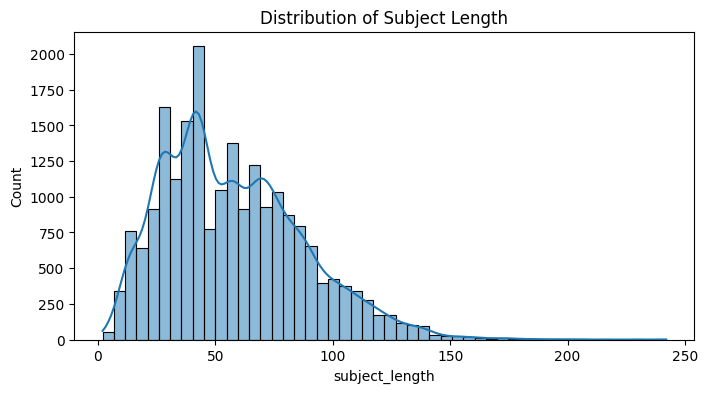

count    21280.000000
mean        57.616212
std         29.874769
min          2.000000
25%         35.000000
50%         53.000000
75%         76.000000
max        242.000000
Name: subject_length, dtype: float64


In [ ]:
# 8.1 Text length analysis for 'Subject' column
df['subject_length'] = df['Subject'].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['subject_length'], bins=50, kde=True)
plt.title("Distribution of Subject Length")
plt.show()

print(df['subject_length'].describe())


In [ ]:
from collections import Counter
import re

def basic_clean(text):
    # Remove non-alphabetic characters, convert to lower, etc.
    text = re.sub('[^a-zA-Z]+', ' ', text)
    return text.strip().lower()

all_subject_text = " ".join(df['Subject'].dropna().astype(str).values)
cleaned_text = basic_clean(all_subject_text)
word_list = cleaned_text.split()

word_counts = Counter(word_list)
common_words = word_counts.most_common(20)
print("Top 20 most common words in Subject:")
for word, freq in common_words:
    print(f"{word}: {freq}")


Top 20 most common words in Subject:
ref: 9304
external: 8751
re: 7499
po: 6750
order: 4204
partssource: 4127
part: 3433
request: 3387
return: 3014
for: 2683
fedex: 2552
a: 2310
fw: 2012
pn: 1483
fyi: 1462
overnight: 1448
customer: 1409
medical: 1291
ground: 1197
quote: 1032


In [ ]:
# 9.1 Emails count by Case Owner
owner_counts = df.groupby('Case Owner')['Subject'].count().sort_values(ascending=False).head(10)
print("Top 10 Case Owners by volume:\n", owner_counts)

# 9.2 Combination of Case Type & Case Detail
type_detail_counts = df.groupby(['Case Type', 'Case Detail']).size().sort_values(ascending=False).head(10)
print("Top (Case Type, Case Detail) pairs:\n", type_detail_counts)


Top 10 Case Owners by volume:
 Case Owner
Customer Care        1259
ISO                   758
Pro Customer Care     628
Returns               582
Jenelyn Cantera       540
Tamilynn Recko        443
Nitsa Duda            416
Reyben Minoza         400
Fred Shaffer IV       383
Leslie Permale        372
Name: Subject, dtype: int64
Top (Case Type, Case Detail) pairs:
 Case Type         Case Detail                                 
Other             Junk                                            3619
Customer Request  Shipping Status                                 2701
Returns           Return Request                                  2136
Purchase Order    New                                             1405
Returns           Supplier Response                               1278
Vendor Request    Shipping/Freight                                1199
Quote Request     Quote Request                                   1107
Vendor Request    Supplier Info & Specs Update                    1013
  

Subject Line Normalization

This snippet:

Checks if the subject is NaN (missing). If so, it leaves it untouched.
Looks for common prefixes (Re:, Fw:, etc.). If the subject starts with one, it strips it away and any leading spaces.
Repeats the check in case multiple prefixes are chained (e.g. “Re: FW: …”).


In [ ]:
import pandas as pd
import numpy as np
import re

# Example: define a function to remove common prefixes like "Re:", "Fw:", "Ref:", "External:"
def normalize_subject(subject):
    """
    Removes common prefixes (e.g., Re:, Fw:, Ref:, External:) at the start of the subject line.
    Returns the cleaned subject string.
    """
    if pd.isnull(subject):
        return subject  # if it's NaN, just return as is

    # Convert to lower for standardized checks
    subj_lower = subject.lower().strip()

    # Common prefixes to remove
    prefixes = ["re:", "fw:", "ref:", "external:"]
    for pfx in prefixes:
        # If subject starts with the prefix, remove it
        if subj_lower.startswith(pfx):
            # Remove the prefix from the original subject, preserving rest
            # e.g. "Re: Hello" -> "Hello"
            length_of_pfx = len(pfx)
            # subject[length_of_pfx:].lstrip() => remove prefix & extra spaces
            subject = subject[length_of_pfx:].lstrip()
            # Re-check with lower-cased substring so we can remove multiple prefixes if needed
            subj_lower = subject.lower()

    return subject

# Apply the function to the 'Subject' column
df['Subject'] = df['Subject'].astype(str).apply(normalize_subject)

# Optional: you might also remove leading/trailing spaces
df['Subject'] = df['Subject'].str.strip()

# Quick check
df[['Subject']].head(10)


,Subject
0,Daily case report for Saturday 1 February - 1 overdue case + 212 unassigned
1,Daily case report for Sunday 2 February - 1 overdue case + 212 unassigned
2,Daily case report for Monday 3 February - 1 overdue case + 212 unassigned
3,Unconfirmed POs
4,ORDER #6810965
5,We value your input Kerry
6,[EXTERNAL] Freight Charges being Charged back to ECMC
7,Add and Address to System
8,Attached Image
9,[EXTERNAL] Update Request.


Department Label Standardization
Let’s assume we want to convert any unusual/invalid department entries to a single “Misc” or “Unknown” label. For example:

Subtotal, Total, Confidential Information - Do Not Distribute → “Misc”

In [ ]:
# Dictionary mapping for unusual department values
dept_map = {
    'Subtotal': 'Misc',
    'Total': 'Misc',
    'Confidential Information - Do Not Distribute': 'Misc',
    'Copyright © 2000-2025 salesforce.com, inc. All rights reserved.': 'Misc'
}

# Replace values in the Department column
df['Department  ↑'] = df['Department  ↑'].replace(dept_map)

# Optionally, if you want to rename "CC Management" to "Customer Care Management", etc.,
# you can add more pairs into the dictionary. Example:
# dept_map_extra = {"CC Management": "Customer Care Management"}
# df['Department  ↑'] = df['Department  ↑'].replace(dept_map_extra)

# Check unique values after replacement
print("Unique Department Values after standardization:")
print(df['Department  ↑'].unique())


Unique Department Values after standardization:
['CC Management' 'Misc' 'Customer Care' 'Gov' 'ISO' 'Pro Customer Care'
 'Returns' 'Returns Management' 'Sodexo']


In [ ]:
known_departments = [
    "Customer Care", "Returns", "Pro Customer Care", "ISO",
    "Gov", "CC Management", "Returns Management", "Sodexo"
]

def standardize_dept(dept):
    if dept not in known_departments:
        return "Misc"
    else:
        return dept

df['Department  ↑'] = df['Department  ↑'].apply(standardize_dept)


Missing Case Type / Case Detail
For Case Type (467 missing) and Case Detail (1,535 missing), you could similarly fill with an "Unknown" category:

In [ ]:
# Fill missing case types/details with 'Unknown'
df['Case Type'] = df['Case Type'].fillna("Unknown")
df['Case Detail'] = df['Case Detail'].fillna("Unknown")


Missing Account Names
3,070 missing in Account Name. Decide if you want to keep them:
Possibly fill with “Unknown Account” or “No Account”.
Or if “Account Name” is critical for your analysis, consider dropping those rows or exploring other columns (e.g., “Senders Domain”) to infer the account.

In [ ]:
df['Account Name'] = df['Account Name'].fillna("No Account")


In [ ]:
pip install --upgrade langchain openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.1/606.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.66.3
    Uninstalling openai-1.66.3:
      Successfully uninstalled openai-1.66.3
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.6
    Uninstalling langchain-text-splitters-0.3.6:
      Successfully uninstalled langchain-text-splitters-0.3.6
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.20
    Uninstalling langchain-0.3.20:
      Successfully uninstalled langchain-0.3.20


In [ ]:
!pip install langchain-openai
!pip install langchain_community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00


In [1]:
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(openai_api_key="")


ModuleNotFoundError: No module named 'langchain_community'

In [ ]:
!pip install -U langgraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.4 MB/s eta 0:00:00


In [ ]:
# You might need to install these if not present.
!pip install -U langgraph langchain langchain_openai langchain_community langchain_core nltk textblob


import os
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from textblob import TextBlob

# LangChain / LangGraph
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

# Core LangGraph classes
from langgraph.graph import StateGraph, END

# We do NOT import LanguageModelRouter because it doesn't exist in newer versions of langgraph
# from langgraph.prebuilt import LanguageModelRouter  # <-- Remove or comment out

# Download NLTK punkt tokenizer if not already present
nltk.download('punkt')



# Set your OpenAI API key if you’re using OpenAI’s LLM
os.environ["OPENAI_API_KEY"] = ""


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.1/417.1 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.3.45
    Uninstalling langchain-core-0.3.45:
      Successfully uninstalled langchain-core-0.3.45


/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# After EDA & cleaning:
# Create a new column for combined content:
df['content'] = (
    df['Subject'].fillna('')
    + "\n\n"
    + df['Case Detail'].fillna('')
)

# Optionally create a unique email ID column if you don't already have one
df['email_id'] = df.index.astype(str)


In [ ]:
# Initialize the ChatOpenAI model
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.3)

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
from textblob import TextBlob

# Make sure to download NLTK resources if you haven't already
nltk.download('punkt')

def analyze_email_complexity(email_text: str) -> float:
    """
    Calculate a simple numeric complexity score:
    - Word count
    - Average sentence length
    - Average word length
    - Number of question marks

    Capped at 10; higher => more complex.
    """
    if not email_text or not isinstance(email_text, str):
        return 0.0

    sentences = sent_tokenize(email_text)
    word_count = len(email_text.split())
    sentence_count = len(sentences)
    avg_sentence_length = word_count / max(sentence_count, 1)
    avg_word_length = len(email_text.replace(" ", "")) / max(word_count, 1)
    question_count = email_text.count('?')

    complexity = (
        (word_count * 0.1)
        + (avg_sentence_length * 0.3)
        + (avg_word_length * 1.0)
        + (question_count * 2.0)
    )

    return min(10.0, complexity)

def determine_complexity_category(score: float) -> str:
    """
    Convert numeric complexity score to a category:
    'low', 'medium', or 'high'.
    """
    if score < 4.0:
        return "low"
    elif score < 7.0:
        return "medium"
    else:
        return "high"

def analyze_sentiment(email_text: str):
    """
    Return (polarity, sentiment_label).
    - polarity < -0.2 => "negative"
    - polarity >  0.2 => "positive"
    - otherwise       => "neutral"
    """
    if not email_text or not isinstance(email_text, str):
        return 0.0, "neutral"

    blob = TextBlob(email_text)
    polarity = blob.sentiment.polarity

    if polarity < -0.2:
        return polarity, "negative"
    elif polarity > 0.2:
        return polarity, "positive"
    else:
        return polarity, "neutral"


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from typing import Optional, List, TypedDict

class EmailState(TypedDict):
    email_id: str
    subject: str
    content: str
    sender: str
    timestamp: str
    complexity_score: Optional[float]
    complexity_category: Optional[str]  # "low", "medium", "high"
    sentiment_score: Optional[float]
    sentiment_category: Optional[str]   # "negative", "neutral", "positive"
    topic_category: Optional[str]
    requires_human: Optional[bool]
    response_template: Optional[str]
    suggested_actions: Optional[List[str]]
    final_response: Optional[str]
    processing_notes: Optional[str]


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import SystemMessage, HumanMessage

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.3)


In [ ]:
def preprocess_email(state: EmailState) -> EmailState:
    """Compute complexity & sentiment, store in state."""
    text = state.get("content", "")

    comp_score = analyze_email_complexity(text)
    comp_cat = determine_complexity_category(comp_score)

    sent_score, sent_cat = analyze_sentiment(text)

    return {
        "complexity_score": comp_score,
        "complexity_category": comp_cat,
        "sentiment_score": sent_score,
        "sentiment_category": sent_cat,
        "processing_notes": f"Analyzed: complexity={comp_score:.2f}, sentiment={sent_cat}"
    }

def categorize_topic(state: EmailState) -> EmailState:
    """
    Use LLM to figure out general topic:
    e.g., 'Order Status', 'Technical Support', 'Returns/Refunds'.
    """
    prompt = ChatPromptTemplate.from_messages([
        SystemMessage(content="You are an AI that categorizes customer emails into broad topics."),
        HumanMessage(content=(
            "Here is a customer's email:\n\n"
            "Subject: {subject}\n"
            "Content: {content}\n\n"
            "Identify the best topic among: "
            "['Order Status', 'Technical Support', 'Billing Issue', 'Returns/Refunds', 'Complaint', 'Other']. "
            "Return only the topic name."
        ))
    ])
    chain = prompt | llm | StrOutputParser()

    topic_raw = chain.invoke({
        "subject": state.get("subject", ""),
        "content": state.get("content", "")
    })
    topic_clean = topic_raw.strip().split("\n")[0]

    return {
        "topic_category": topic_clean,
        "processing_notes": state.get("processing_notes", "") + f" | Topic={topic_clean}"
    }

def route_by_complexity(state: EmailState) -> str:
    """
    This function decides which node to go to next:
    'low_complexity', 'medium_complexity', or 'high_complexity'.
    """
    ccat = state.get("complexity_category", "medium")
    return ccat

def process_low_complexity(state: EmailState) -> EmailState:
    """Auto-reply for low complexity emails."""
    prompt = ChatPromptTemplate.from_messages([
        SystemMessage(content="You are a customer support assistant. Provide a short helpful reply."),
        HumanMessage(content=(
            "Email content:\n{content}\n\n"
            "Topic: {topic}\n"
            "Sentiment: {sentiment}\n\n"
            "Generate a concise, friendly response."
        ))
    ])
    chain = prompt | llm | StrOutputParser()
    resp = chain.invoke({
        "content": state.get("content", ""),
        "topic": state.get("topic_category", ""),
        "sentiment": state.get("sentiment_category", "")
    })

    return {
        "requires_human": False,
        "final_response": resp.strip(),
        "processing_notes": state.get("processing_notes", "") + " | Auto-replied (low complexity)."
    }

def process_medium_complexity(state: EmailState) -> EmailState:
    """Draft a response + suggest actions, but require human review."""
    prompt = ChatPromptTemplate.from_messages([
        SystemMessage(content=(
            "You are a customer support AI. The email is medium complexity. "
            "Generate a draft response and suggest up to 3 actions for a human agent."
        )),
        HumanMessage(content=(
            "Email content:\n{content}\n\n"
            "Topic: {topic}\n"
            "Sentiment: {sentiment}\n"
            "Provide response draft and 1-3 suggested actions (semicolon-separated)."
        ))
    ])
    chain = prompt | llm | StrOutputParser()
    result = chain.invoke({
        "content": state.get("content", ""),
        "topic": state.get("topic_category", ""),
        "sentiment": state.get("sentiment_category", "")
    })

    parts = result.split("Suggested actions:", 1)
    draft = parts[0].strip()
    suggested_actions = []
    if len(parts) > 1:
        action_text = parts[1].strip()
        suggested_actions = [act.strip() for act in action_text.split(";") if act.strip()]

    return {
        "requires_human": True,
        "response_template": draft,
        "suggested_actions": suggested_actions,
        "processing_notes": state.get("processing_notes", "") + " | Medium complexity - partial automation."
    }

def process_high_complexity(state: EmailState) -> EmailState:
    """Provide analysis only; fully escalate to human."""
    prompt = ChatPromptTemplate.from_messages([
        SystemMessage(content="You are analyzing a high complexity customer email that requires human agent involvement."),
        HumanMessage(content=(
            "Email content:\n{content}\n\n"
            "Topic: {topic}\n"
            "Sentiment: {sentiment}\n"
            "Provide a concise analysis of the main issue(s) and recommended next steps for a human agent."
        ))
    ])
    chain = prompt | llm | StrOutputParser()
    analysis = chain.invoke({
        "content": state.get("content", ""),
        "topic": state.get("topic_category", ""),
        "sentiment": state.get("sentiment_category", "")
    })

    return {
        "requires_human": True,
        "processing_notes": state.get("processing_notes", "")
            + f" | High complexity. Analysis for human agent: {analysis}"
    }

def finalize_processing(state: EmailState) -> EmailState:
    """Add a finishing note to 'processing_notes'."""
    ccat = state.get("complexity_category", "unknown")
    requires = state.get("requires_human", True)
    note = "Requires human attention." if requires else "Auto-complete."

    final_note = f"\nProcessing finished. Complexity={ccat}. {note}"

    return {
        "processing_notes": state.get("processing_notes", "") + final_note
    }


In [ ]:
from langgraph.graph import StateGraph, END

# Build the graph
workflow = StateGraph(EmailState)

# Add nodes
workflow.add_node("preprocess", preprocess_email)
workflow.add_node("categorize_topic", categorize_topic)
workflow.add_node("low_complexity", process_low_complexity)
workflow.add_node("medium_complexity", process_medium_complexity)
workflow.add_node("high_complexity", process_high_complexity)
workflow.add_node("finalize", finalize_processing)

# Connect them
workflow.add_edge("preprocess", "categorize_topic")

# Route by complexity:
#   low => "low_complexity", medium => "medium_complexity", high => "high_complexity"
workflow.add_conditional_edges(
    "categorize_topic",
    route_by_complexity,
    {
        "low": "low_complexity",
        "medium": "medium_complexity",
        "high": "high_complexity"
    }
)

workflow.add_edge("low_complexity", "finalize")
workflow.add_edge("medium_complexity", "finalize")
workflow.add_edge("high_complexity", "finalize")

# Mark "preprocess" as the entry point
workflow.set_entry_point("preprocess")

# The finalize node leads to END
workflow.add_edge("finalize", END)

# Compile
app = workflow.compile()


In [ ]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
sample_emails = [
    {
        "email_id": "test001",
        "subject": "Order Status Inquiry",
        "content": "Hi, can you check the status of my order #12345? Thanks!",
        "sender": "some_user@example.com",
        "timestamp": "2025-02-15T09:30:00Z",
    },
    {
        "email_id": "test002",
        "subject": "Technical Problem with Part",
        "content": (
            "Hello, the part #ABC-999 doesn't fit properly on my 2022 device. "
            "I'm seeing a 2mm gap. Should I return it or request a replacement?"
        ),
        "sender": "engineer@example.com",
        "timestamp": "2025-02-16T14:22:00Z",
    },
    {
        "email_id": "test003",
        "subject": "URGENT - Safety Concern with Brake System",
        "content": (
            "I'm extremely concerned about the defective brake pads (#89765). "
            "Severe vibration above 45mph. This is a serious safety issue, please fix it immediately!"
        ),
        "sender": "angry_customer@example.com",
        "timestamp": "2025-02-17T08:15:00Z",
    },
]

for email in sample_emails:
    print(f"\n--- Processing {email['email_id']} ---")
    result = app.invoke(email)
    print("Complexity:", result.get('complexity_category'),
          f"(Score={result.get('complexity_score'):.2f})")
    print("Sentiment:", result.get('sentiment_category'),
          f"(Score={result.get('sentiment_score'):.2f})")
    print("Topic:", result.get('topic_category'))
    print("Requires Human:", result.get('requires_human'))

    print("Final Response:", result.get('final_response', 'None'))
    print("Response Template:", result.get('response_template', 'None'))
    print("Suggested Actions:", result.get('suggested_actions', 'None'))
    print("Processing Notes:", result.get('processing_notes'))



--- Processing test001 ---
Complexity: high (Score=8.93)
Sentiment: positive (Score=0.25)
Topic: To determine the best topic for the customer's email, I would need to analyze the content of the email. Please provide me with the content of the email so that I can categorize it accurately.
Requires Human: True
Final Response: None
Response Template: None
Suggested Actions: None
Processing Notes: Analyzed: complexity=8.93, sentiment=positive | Topic=To determine the best topic for the customer's email, I would need to analyze the content of the email. Please provide me with the content of the email so that I can categorize it accurately. | High complexity. Analysis for human agent: Main issue(s): {Main issues identified in the email content}
Recommended next steps:
1. Acknowledge the customer's concerns and empathize with their situation.
2. Address each specific issue raised in the email and provide clear and detailed explanations or solutions.
3. Offer any necessary assistance or suppo

In [ ]:
def process_dataset(
    df: pd.DataFrame,
    content_col: str = "content",
    subject_col: str = "Subject",
    sender_col: str = "Senders Domain",
    time_col: str = "Date/Time Opened",
    id_col: str = "email_id"
):
    """
    Runs the compiled LangGraph pipeline on each row of df.
    Returns a DataFrame of results.
    """
    results = []

    for i, row in df.iterrows():
        # Construct the input state
        email_state = {
            "email_id": str(row.get(id_col, f"email_{i}")),
            "subject": str(row.get(subject_col, "")),
            "content": str(row.get(content_col, "")),
            "sender": str(row.get(sender_col, "")),
            "timestamp": str(row.get(time_col, "")),
        }

        try:
            out = app.invoke(email_state)
            results.append(out)
        except Exception as e:
            print(f"Error on row {i}: {e}")
            results.append({"email_id": row.get(id_col, f"email_{i}"), "error": str(e)})

    return pd.DataFrame(results)

# Example usage after your EDA + cleaning:
# results_df = process_dataset(df)
# Check the final distribution of complexities, sentiments, etc.
# results_df['complexity_category'].value_counts()
# results_df['sentiment_category'].value_counts()
# results_df.head()


In [ ]:
# 1. Process the dataset
results_df = process_dataset(df)

# 2. Display the first 5 rows
display(results_df.head(5))


In [ ]:
# After running your dataset through process_dataset:
results_df = process_dataset(df)

# Display a random sample of 5 rows
random_five = results_df.sample(1, random_state=42)
display(random_five)
